# Funções Harmônicas

Este notebook tem a intenção de demonstrar como provar que uma função é harmônica, ou seja, como ver que um determinado potencial é solução da [Equação de Laplace](https://en.wikipedia.org/wiki/Laplace%27s_equation).

## As funções harmônicas e a Teoria do Potencial

### A Equação de Laplace 
Uma Equação de Laplace é uma equação diferencial parcial de segunda ordem, nomeada em homenagem a [Pierre-Simon Laplace](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace), que investigou pela primeira vez suas soluções e consequências na descrição de fenômenos físicos. Portanto, esta equação é definida como um operador de segunda ordem dado por: 

$$ \nabla^2 f(x,y,z) = 0, $$
em que $f(x,y,z)$ é uma função diferenciável até segunda ordem e $\nabla^2 \equiv \nabla \cdot \nabla$ é o **Operador Laplaciano**. Portanto, o estudo teórico das soluções da equação de Laplace é conhecido como [Teoria do Potencial](https://en.wikipedia.org/wiki/Potential_theory).

### A solução da Equação de Laplace - Funções Harmônicas

Em termos práticos, estudamos potenciais que são gerados por uma dada distribuição de propriedade física. No entanto, estas distribuições não são conhecidas a priori, de forma que só teremos em mãos as observações geradas por elas. Portanto, estas observações podem auxiliar na determinação dos potenciais de interesse em determinadas condições, que, geralmente, são determinados em regiões livres de fonte. Estes potenciais, dentro desta condição, satisfazem a equação de Laplace e são ditas como funções harmônicas. Neste sentido um potencial é dito harmônico se:

$$\nabla^2 \phi(x,y,z) = \frac{\partial^2 \phi(x,y,z)}{\partial x^2} + \frac{\partial^2 \phi(x,y,z)}{\partial y^2} + \frac{\partial^2 \phi(x,y,z)}{\partial z^2}  = 0,$$
em que $\phi (x,y,z)$ é o potencial que gera um determinado campo em $\mathbb{R}^3$. 



## Um exemplo de função harmônica :

Considere um sistema de coordenadas cartesiano no qual os eixos $x$, $y$ e $z$ são orientados positivamente para norte, leste e para baixo, respectivamente. Seja um potencial $\phi (x,y,z)$ que é dado por: 

$$ \phi (x,y,z) = \frac{1}{\parallel \mathbf{r} - \mathbf{r}' \parallel}, $$
em que $\mathbf{r} \in \mathbb{R}^3$ é um vetor que localiza um ponto $(x,y,z)$ e $\mathbf{r}' \in \mathbb{R}^3$ um vetor que localiza um ponto $(x',y',z')$. Portanto, $\phi(x,y,z)$ é apenas uma função que é o inverso da distância (dada pela norma euclidiana) entre dois pontos localizados pelos vetores $\mathbf{r}$ e $\mathbf{r'}$. 

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definindo os vetores e visualizando o potencial

In [2]:
x = np.linspace(-10.,10.,num=50,endpoint=True)
y = np.linspace(-10.,10.,num=50,endpoint=True)
Y,X = np.meshgrid(y,x)
Z = np.zeros_like(X)

In [3]:
x_line = 0.
y_line = 0.
z_line = 5.

In [4]:
norm_r = np.sqrt((X - x_line)**2 + (Y - y_line)**2 + (Z - z_line)**2)

In [5]:
phi = 1/norm_r

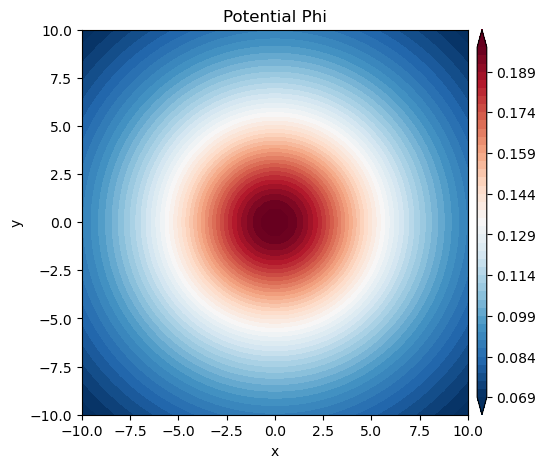

In [13]:
fig,ax = plt.subplots(figsize=(6,5))

cm = ax.contourf(X,Y,phi,50,cmap='RdBu_r',extend='both')
fig.colorbar(cm, ax=ax,shrink=1.0,aspect=40,pad=0.02)
ax.set_title('Potential Phi')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

## Como provar que esse potencial é harmônico? 

Este potencial será harmônico se:

$$ \frac{\partial^2 \phi(x,y,z)}{\partial x^2} + \frac{\partial^2 \phi(x,y,z)}{\partial y^2} + \frac{\partial^2 \phi(x,y,z)}{\partial z^2}  = 0$$.


#### Faça as derivadas e some:

As derivadas deste potencial serão iguais a:

$$ \phi_{xx} = \frac{3(x - x')^2 - \parallel \mathbf{r} - \mathbf{r}' \parallel^2}{\parallel \mathbf{r} - \mathbf{r}' \parallel^5}, $$

$$ \phi_{yy} = \frac{3(y - y')^2 - \parallel \mathbf{r} - \mathbf{r}' \parallel^2}{\parallel \mathbf{r} - \mathbf{r}' \parallel^5}, $$
e
$$ \phi_{zz} = \frac{3(z - z')^2 - \parallel \mathbf{r} - \mathbf{r}' \parallel^2}{\parallel \mathbf{r} - \mathbf{r}' \parallel^5}. $$


In [7]:
phi_xx = ((3*(X - x_line)**2) - norm_r**2)/norm_r**5

In [8]:
phi_yy = ((3*(Y - y_line)**2) - norm_r**2)/norm_r**5

In [9]:
phi_zz = ((3*(Z - z_line)**2) - norm_r**2)/norm_r**5

In [10]:
tol = 1e-14

In [11]:
np.all(phi_xx + phi_yy + phi_zz < tol) 

True